In [474]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objs as go
import json
from plotly.offline import iplot, init_notebook_mode
mapbox_access_token = 'pk.eyJ1IjoicWp1bmo2NjYiLCJhIjoiY2p6cG85cDh6MHJ1ajNsbzVoc3hlYTU0OCJ9.Z7Rz37JQtKqh9wzLq10Igw'

In [487]:
df = pd.read_csv(r"C:\Users\junjq\Downloads\2016-12-20.csv")
median_df = pd.read_csv(r"C:\Users\junjq\Downloads\medianAskingRent_All\medianAskingRent_All.csv")
median_df.columns = ['neighborhood', "median_price"]
df_geo=pd.read_csv(r"C:\Users\junjq\Downloads\geo_data.csv")

C:\Users\junjq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning:

Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.



In [488]:
df = pd.merge(df, median_df, how = "left", on = "neighborhood")

In [489]:
df.head()

,Unnamed: 0,data_id,scrape_date,link,address,price,sq_ft,per_sq_ft,rooms,beds,...,2,3,4,5,6,7,S,LIRR,PATH,median_price
0,0,1909919.0,2016-12-19,http://streeteasy.com/building/267-sackett-str...,267 Sackett Street #1,6950,NaN,NaN,7.0,2.0,...,0.76,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900.0
1,1,1932126.0,2016-12-19,http://streeteasy.com/building/oosten-condomin...,429 Kent Avenue #603,5200,1059.0,58.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3062.0
2,2,1958494.0,2016-12-19,http://streeteasy.com/building/166-2-avenue-ne...,166 Second Avenue,3450,NaN,NaN,2.0,NaN,...,NaN,NaN,0.45,0.45,0.24,NaN,NaN,NaN,NaN,3000.0
3,3,1958488.0,2016-12-19,http://streeteasy.com/building/1593-gates-aven...,1593 Gates Avenue #3B,2700,NaN,NaN,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2488.0
4,4,1958487.0,2016-12-19,http://streeteasy.com/building/328-west-47-str...,328 West 47th Street,2895,NaN,NaN,4.0,2.0,...,0.34,0.34,NaN,NaN,NaN,0.34,0.34,NaN,NaN,NaN


In [490]:
# check missing values
missing_data = df.isnull().sum(axis = 0).reset_index()
missing_data.columns = ['variable', 'missing values']
missing_data['missing%'] = missing_data['missing values'] / df.shape[0] * 100
missing_data_srt = missing_data.sort_values('missing%', ascending = False).reset_index(drop = True)
missing_data_srt[missing_data_srt['missing%'] > 0]

,variable,missing values,missing%
0,PATH,25206,93.386684
1,LIRR,24884,92.193694
2,S,24488,90.726538
3,7,24200,89.659516
4,Z,23449,86.877107
5,J,23021,85.291393
6,L,22829,84.580045
7,G,22793,84.446667
8,D,21379,79.207884
9,E,20686,76.640362


In [491]:
def convert_y(y):
    try:
        return float(y)
    except:
        y = float(str(y).replace(',', '').split('$')[-1])
        return y
df['price']= df['price'].apply(convert_y)

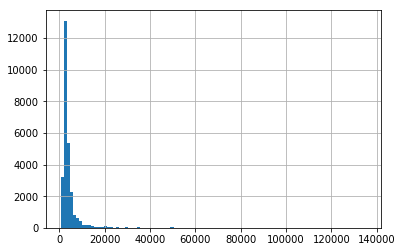

In [492]:
# check y distribution
df['price'].hist(bins=100)

In [493]:
# find percentiles for price
df['price'].quantile(np.linspace(0.025, 1, 39 ,0))

0.025     1556.00
0.050     1700.00
0.075     1800.00
0.100     1900.00
0.125     1999.00
0.150     2062.00
0.175     2150.00
0.200     2200.00
0.225     2295.00
0.250     2350.00
0.275     2400.00
0.300     2475.00
0.325     2500.00
0.350     2578.50
0.375     2627.50
0.400     2700.00
0.425     2750.00
0.450     2800.00
0.475     2900.00
0.500     2995.00
0.525     3028.75
0.550     3150.00
0.575     3200.00
0.600     3300.00
0.625     3434.50
0.650     3500.00
0.675     3642.50
0.700     3800.00
0.725     3990.00
0.750     4160.00
0.775     4400.00
0.800     4625.00
0.825     4995.00
0.850     5329.50
0.875     5817.25
0.900     6500.00
0.925     7736.50
0.950     9800.00
0.975    14500.00
Name: price, dtype: float64

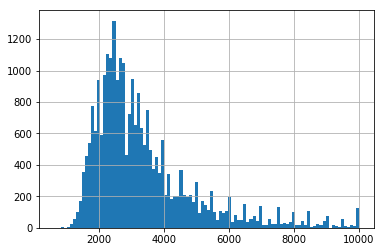

In [494]:
# exclude extreme prices
df = df[(df['price'] > 0) & (df['price'] <= 10000)]
df.shape
# check y distribution
df['price'].hist(bins=100)

In [495]:
df

,Unnamed: 0,data_id,scrape_date,link,address,price,sq_ft,per_sq_ft,rooms,beds,...,2,3,4,5,6,7,S,LIRR,PATH,median_price
0,0,1909919.0,2016-12-19,http://streeteasy.com/building/267-sackett-str...,267 Sackett Street #1,6950.0,NaN,NaN,7.0,2.0,...,0.760000,0.760000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2900.0
1,1,1932126.0,2016-12-19,http://streeteasy.com/building/oosten-condomin...,429 Kent Avenue #603,5200.0,1059.0,58.0,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3062.0
2,2,1958494.0,2016-12-19,http://streeteasy.com/building/166-2-avenue-ne...,166 Second Avenue,3450.0,NaN,NaN,2.0,NaN,...,NaN,NaN,0.45,0.45,0.24,NaN,NaN,NaN,NaN,3000.0
3,3,1958488.0,2016-12-19,http://streeteasy.com/building/1593-gates-aven...,1593 Gates Avenue #3B,2700.0,NaN,NaN,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2488.0
4,4,1958487.0,2016-12-19,http://streeteasy.com/building/328-west-47-str...,328 West 47th Street,2895.0,NaN,NaN,4.0,2.0,...,0.340000,0.340000,NaN,NaN,NaN,0.34,0.34,NaN,NaN,NaN
5,5,1958486.0,2016-12-19,http://streeteasy.com/building/1634-st-nichola...,1634 Saint Nicholas Avenue,1900.0,NaN,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1958482.0,2016-12-19,http://streeteasy.com/building/4161-broadway-m...,701 West 176th Street #6G,2850.0,NaN,NaN,5.5,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1958480.0,2016-12-19,http://streeteasy.com/building/new-amsterdam/8e,320 East 23rd Street #8E,2595.0,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,0.41,NaN,NaN,NaN,NaN,3395.0
8,8,1958476.0,2016-12-19,http://streeteasy.com/building/the-giovanni/11e,81 Fleet Place #11E,3895.0,880.0,53.0,4.0,2.0,...,0.300000,0.300000,0.39,0.39,NaN,NaN,NaN,NaN,NaN,3067.0
9,9,1958477.0,2016-12-19,http://streeteasy.com/building/555-west-23-str...,555 West 23rd Street #N3d,3500.0,515.0,81.0,3.0,1.0,...,NaN,NaN,NaN,NaN,NaN,0.61,NaN,0.660000,NaN,NaN


# Feature engineering

In [496]:
# get features
ind = df[["per_sq_ft",'price', 'beds', 'baths', 'unit_type','neighborhood','median_price']].dropna()
x = ind[['beds', 'baths','median_price']]
y = ind['price']

In [497]:
# convert categorical unit type to numerical
dummy = pd.get_dummies(ind['unit_type'], prefix='is')
x2 = pd.concat([x,dummy],axis = 1)

In [498]:
# convert categorical unit type to numerical
dummy2 = pd.get_dummies(ind['neighborhood'], prefix='is')
x2 = pd.concat([x2,dummy2],axis = 1)


In [499]:
x.corr()

,beds,baths,median_price
beds,1.000000,0.500713,-0.136445
baths,0.500713,1.000000,0.152679
median_price,-0.136445,0.152679,1.000000


In [500]:
x2.corr()

,beds,baths,median_price,is_Apartment,is_Building,is_Co-op,is_Condo,is_Condop,is_Multi-family,is_Other type,...,is_University Heights,is_Upper East Side,is_Upper West Side,is_Washington Heights,is_West Harlem,is_West Village,is_Williamsburg,is_Windsor Terrace,is_Woodhaven,is_Woodside
beds,1.000000,0.500713,-0.136445,0.007931,-0.008427,-0.046258,-0.069215,-0.006936,0.048560,0.003546,...,-0.017600,-0.027602,-0.041869,0.076093,0.030558,-0.039091,-0.041033,0.013699,-0.006376,-0.000895
baths,0.500713,1.000000,0.152679,0.008096,-0.062660,-0.040548,0.166990,-0.008238,-0.060084,0.016679,...,-0.013352,0.026620,0.057219,-0.013045,-0.015946,0.013062,-0.014236,0.014665,-0.021118,-0.023123
median_price,-0.136445,0.152679,1.000000,-0.006369,-0.143235,-0.007006,0.224955,-0.003299,-0.121673,0.008937,...,-0.030919,-0.017077,0.067043,-0.093750,-0.024509,0.045927,-0.013752,-0.032694,-0.043771,-0.060510
is_Apartment,0.007931,0.008096,-0.006369,1.000000,-0.006150,-0.005611,-0.016586,-0.001236,-0.007033,-0.000437,...,-0.000618,-0.004819,-0.008694,-0.003459,-0.001576,0.052310,0.017363,-0.002099,-0.000977,-0.001803
is_Building,-0.008427,-0.062660,-0.143235,-0.006150,1.000000,-0.035327,-0.104426,-0.007781,-0.044283,-0.002749,...,-0.003888,-0.016661,-0.050745,-0.012354,0.010555,-0.013099,-0.017788,0.033022,-0.006150,0.024478
is_Co-op,-0.046258,-0.040548,-0.007006,-0.005611,-0.035327,1.000000,-0.095278,-0.007099,-0.040403,-0.002508,...,-0.003548,0.017017,0.006558,0.031446,-0.009054,0.059861,-0.042367,-0.012055,-0.005611,-0.010358
is_Condo,-0.069215,0.166990,0.224955,-0.016586,-0.104426,-0.095278,1.000000,-0.020986,-0.119432,-0.007415,...,0.013374,0.065244,-0.023490,-0.045801,-0.017396,-0.018041,-0.005927,-0.028585,-0.016586,-0.022423
is_Condop,-0.006936,-0.008238,-0.003299,-0.001236,-0.007781,-0.007099,-0.020986,1.000000,-0.008899,-0.000552,...,-0.000781,0.092359,-0.011000,-0.004376,-0.001994,-0.004482,-0.010341,-0.002655,-0.001236,-0.002282
is_Multi-family,0.048560,-0.060084,-0.121673,-0.007033,-0.044283,-0.040403,-0.119432,-0.008899,1.000000,-0.003144,...,-0.004447,-0.028652,-0.044956,-0.016573,0.006762,-0.009227,-0.003019,-0.001482,-0.007033,0.018705
is_Other type,0.003546,0.016679,0.008937,-0.000437,-0.002749,-0.002508,-0.007415,-0.000552,-0.003144,1.000000,...,-0.000276,-0.002154,-0.003886,-0.001546,-0.000705,-0.001584,-0.003654,-0.000938,-0.000437,-0.000806


In [501]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)
xTrain2, xTest2, yTrain, yTest = train_test_split(x2, y, test_size = 0.2, random_state = 0)
print(xTrain.shape)
print(yTrain.shape)

(4099, 3)
(4099,)


In [502]:
# fit standardizer to training set
standardizer = StandardScaler()
standardizer.fit(xTrain)
xTrain = standardizer.transform(xTrain)
xTest = standardizer.transform(xTest)
standardizer.fit(xTrain2)
xTrain2 = standardizer.transform(xTrain2)
xTest2 = standardizer.transform(xTest2)

C:\Users\junjq\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

C:\Users\junjq\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.

C:\Users\junjq\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning:

Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.



In [503]:
# covert labels to arrays
y_train = yTrain.values.ravel()
y_test = yTest.values.ravel()

# Simple Linear Regression

In [504]:
#Linear Regression - without categorical data
linearRegressor = LinearRegression(normalize=True)
linearRegressor.fit(xTrain, yTrain)
# Make predictions using the testing set
y_pred = linearRegressor.predict(xTest)

# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred), 2))




Mean Squared Error:  1464657.91
Mean Absolute Error:  837.47
Mean Absolute Percentage Error:  21.25
Accuracy:  78.75 %
R-squared:  0.61


In [505]:
#Linear Regression - with categorical data
linearRegressor = LinearRegression(normalize=True)
linearRegressor.fit(xTrain2, yTrain)
# Make predictions using the testing set
y_pred = linearRegressor.predict(xTest2)

# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred), 2))

Mean Squared Error:  9.65861161024155e+28
Mean Absolute Error:  11987353854328.6
Mean Absolute Percentage Error:  577297864291.58
Accuracy:  -577297864191.58 %
R-squared:  -2.5684992119264816e+22


It is showing that having the categorical data introduces a lot of noises. Thus, we should use Lasso to control those noises.

# Lasso regression

In [506]:
base_lasso = Lasso()
base_lasso.set_params(alpha=0.25)
base_lasso.fit(xTrain2, yTrain)
y_pred_lasso = base_lasso.predict(xTest2)
    
# caculate MSE, MAE, MAPE, and Accuracy
errors = abs(y_pred_lasso - y_test)
mae = round(np.mean(errors), 2)
mape = round(np.mean(100 * (errors / y_test)), 2)
accuracy = 100 - mape
print('Mean Squared Error: ', round(mean_squared_error(y_test, y_pred_lasso), 2))
print('Mean Absolute Error: ', mae)
print('Mean Absolute Percentage Error: ', mape)
print('Accuracy: ', accuracy, "%")
print('R-squared: ', round(r2_score(y_test, y_pred_lasso), 2))

Mean Squared Error:  1127817.79
Mean Absolute Error:  754.85
Mean Absolute Percentage Error:  19.6
Accuracy:  80.4 %
R-squared:  0.7


C:\Users\junjq\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.



It is showing that Lasso successfully control the noises introduced by the categorical data. Thus, we should use Lasso to control those noises.

In [473]:
# create scatter plot

ind_merge = pd.merge(ind, df_geo, how="left",left_on="neighborhood", right_on="properties.neighbourhood")

ind_merge['text'] = ind_merge['neighborhood']+": "+ ind_merge['median_price'].map(str)
data = [go.Scattermapbox(lat = ind_merge['latitude'], 
                         lon = ind_merge['longitude'],
                         mode = 'markers',
                         marker = dict(size = 10, opacity = 0.5, 
                                       color = ind_merge['median_price'],
                                       colorbar = dict(title = 'median_price'),
                                       colorscale = 'Jet'),
                         text = ind_merge['text'])]
layout = go.Layout(title = 'Median Rental Price for 1 Bedroom in New York City',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 40.7280, lon = -73.9960),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))
figure = dict(data=data, layout=layout)
iplot(figure)